In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [2]:
# Date is up to Nov 6
date_data = pd.read_csv('/Users/liuye/ForPython/Optimal-Cryptocurrency-Trading-Strategies-Step2/Medium_Analysis/Webscrapping/kybermedium.csv')

In [3]:
date_data['Date'][0]= '·Nov 6'
date_data['Date'][1]= '·Nov 5'

C:\Users\liuye\anaconda3\envs\work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\liuye\anaconda3\envs\work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
dt = []
for x in date_data['Date']:
    d = x[1:]
    dt.append(parse(d))

ParserError: Unknown string format: eb 19, 2020

In [5]:
len(dt)

117

In [6]:
date_data['Date'][119]

'·Feb 17, 2020'

In [7]:
price = pd.read_csv('/Users/liuye/ForPython/Optimal-Cryptocurrency-Trading-Strategies-Step2/Medium_Analysis/Data Extraction/KNCUSDT-1d-binance.csv')

In [8]:
price

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2020-06-12,1.154,1.345,1.122,1.279,1784200.443,1592006399999,2.248349e+06,7342,852535.463,1.075682e+06,0
1,2020-06-13,1.282,1.296,1.171,1.203,1439776.969,1592092799999,1.768370e+06,5902,757962.586,9.311792e+05,0
2,2020-06-14,1.204,1.249,1.121,1.171,1539296.314,1592179199999,1.830286e+06,7034,698799.450,8.322369e+05,0
3,2020-06-15,1.171,1.218,1.051,1.165,1840790.506,1592265599999,2.108569e+06,6219,795939.113,9.136746e+05,0
4,2020-06-16,1.165,1.267,1.141,1.256,1534566.671,1592351999999,1.856095e+06,4436,694031.507,8.413588e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
518,2021-11-12,1.865,1.923,1.780,1.850,2878451.400,1636761599999,5.342121e+06,18372,1436630.900,2.668999e+06,0
519,2021-11-13,1.851,1.928,1.817,1.886,1853695.200,1636847999999,3.465713e+06,14576,921417.600,1.722206e+06,0
520,2021-11-14,1.884,1.891,1.819,1.882,1614662.900,1636934399999,3.003461e+06,12393,812877.300,1.512401e+06,0
521,2021-11-15,1.883,1.967,1.858,1.895,2847055.900,1637020799999,5.456113e+06,21325,1409817.200,2.701448e+06,0


In [9]:
ddt = pd.DataFrame(dt, columns = ['timestamp'])
ddt['signal'] = 1

def convert_datetime(adt):
    return datetime.strftime(adt, '%Y-%m-%d')

ddt['timestamp']= ddt['timestamp'].apply(convert_datetime)

In [10]:
ddt['timestamp']

0      2021-11-06
1      2021-11-05
2      2021-10-27
3      2021-10-22
4      2021-10-14
          ...    
112    2020-03-06
113    2020-03-02
114    2020-02-27
115    2020-02-26
116    2020-02-20
Name: timestamp, Length: 117, dtype: object

In [11]:
df = pd.merge(price,ddt,how="left", on='timestamp')

In [12]:
df = df.fillna(0)
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,signal
0,2020-06-12,1.154,1.345,1.122,1.279,1784200.443,1592006399999,2.248349e+06,7342,852535.463,1.075682e+06,0,1.0
1,2020-06-13,1.282,1.296,1.171,1.203,1439776.969,1592092799999,1.768370e+06,5902,757962.586,9.311792e+05,0,0.0
2,2020-06-14,1.204,1.249,1.121,1.171,1539296.314,1592179199999,1.830286e+06,7034,698799.450,8.322369e+05,0,0.0
3,2020-06-15,1.171,1.218,1.051,1.165,1840790.506,1592265599999,2.108569e+06,6219,795939.113,9.136746e+05,0,1.0
4,2020-06-16,1.165,1.267,1.141,1.256,1534566.671,1592351999999,1.856095e+06,4436,694031.507,8.413588e+05,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,2021-11-12,1.865,1.923,1.780,1.850,2878451.400,1636761599999,5.342121e+06,18372,1436630.900,2.668999e+06,0,0.0
532,2021-11-13,1.851,1.928,1.817,1.886,1853695.200,1636847999999,3.465713e+06,14576,921417.600,1.722206e+06,0,0.0
533,2021-11-14,1.884,1.891,1.819,1.882,1614662.900,1636934399999,3.003461e+06,12393,812877.300,1.512401e+06,0,0.0
534,2021-11-15,1.883,1.967,1.858,1.895,2847055.900,1637020799999,5.456113e+06,21325,1409817.200,2.701448e+06,0,0.0


In [13]:
#Statistical Analysis
df['clop'] = np.log(df['close'])-np.log(df['open'])
df[['signal','clop','volume','trades']].corr()

,signal,clop,volume,trades
signal,1.000000,0.054327,-0.031315,-0.067110
clop,0.054327,1.000000,0.179868,0.156842
volume,-0.031315,0.179868,1.000000,0.934430
trades,-0.067110,0.156842,0.934430,1.000000


In [14]:
df[['open','high','low','close']].corr()

,open,high,low,close
open,1.000000,0.988121,0.983766,0.979957
high,0.988121,1.000000,0.981468,0.988831
low,0.983766,0.981468,1.000000,0.991296
close,0.979957,0.988831,0.991296,1.000000


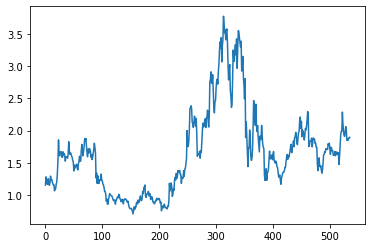

In [15]:
plt.plot(df['open'])

In [16]:
# buy it at the open and sell it at next day open
pnl = []
pnl.append(1000)
for k in range(len(df)):
    if df.iloc[k]['signal'] == 1:
        share = pnl[-1]/df.iloc[k]['open']
        earn = share * df.iloc[k+1]['open']
    pnl.append(earn)    

        
pnl1 = pnl      

In [17]:
# buy it at the open and sell it at next day close
pnl = []
pnl.append(1000)
for k in range(len(df)):
    if df.iloc[k]['signal'] == 1:
        share = pnl[-1]/df.iloc[k]['open']
        pnl.append(share * df.iloc[k+1]['close'])
        
pnl[-1]

3365.455953950967

In [18]:
# buy it at the close and sell it at next day close
pnl = []
pnl.append(1000)
for k in range(len(df)):
    if df.iloc[k]['signal'] == 1:
        share = pnl[-1]/df.iloc[k]['close']
        pnl.append(share * df.iloc[k+1]['close'])
        
pnl[-1]

1520.4094223692616

In [19]:
# buy it at the open and sell it at close
pnl = []
pnl.append(1000)
for k in range(len(df)):
    if df.iloc[k]['signal'] == 1:
        share = pnl[-1]/df.iloc[k]['open']
        earn = share * df.iloc[k]['close']
    pnl.append(earn)    
pnl2 = pnl

In [20]:
baseline = df['open']/df['open'][0] * 1000

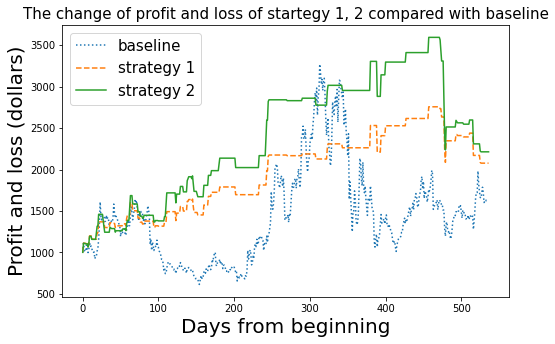

In [24]:

plt.figure(figsize=(8, 5))
plt.plot(baseline,label = "baseline", linestyle=":")
plt.plot(pnl1,label = "strategy 1", linestyle="--")
plt.plot(pnl2,label = "strategy 2", linestyle="-")
plt.xlabel('Days from beginning',fontsize=20)
plt.ylabel('Profit and loss (dollars)',fontsize=20)
plt.title('The change of profit and loss of startegy 1, 2 compared with baseline',fontsize=15)
plt.legend( prop={'size': 15})
plt.show()